In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Support Vector Regression (SVR) Learning Notes

This is my notebook for learning Support Vector Regression. Unlike SVC which does classification (predicting categories), SVR does regression (predicting continuous numbers).

**What I'm learning today:**
- How to create regression datasets with make_regression
- How SVR works differently from SVC
- Parameter tuning with GridSearchCV for regression
- Evaluating regression models with R² score

**Key difference from classification:**
Instead of finding a line that separates classes, SVR finds a line (or curve) that best fits through the data points, trying to keep most points within a certain distance (epsilon) from the line.

In [4]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

## Creating regression data with make_regression

I need to understand this function thoroughly since it's perfect for testing regression algorithms.

**What make_regression does:**
Creates artificial datasets for regression problems. Unlike make_classification which creates categories, this creates continuous target values (like predicting house prices, temperatures, etc.).

**Breaking down my parameters:**
```python
X, y = make_regression(
    n_samples=1000,      # Create 1000 data points
    n_features=2,        # Each point has 2 input features
    n_targets=1,         # Predict 1 continuous value
    noise=3.0           # Add some randomness to make it realistic
)
```

**Parameter details:**

**n_samples=1000:**
- How many data points to generate
- 1000 is good for learning - enough to see patterns, not too slow
- More samples = more training data but slower computation

**n_features=2:**
- Number of input variables (X columns)
- 2 features means I can plot it in 2D and actually see what's happening
- Real problems might have dozens or hundreds of features

**n_targets=1:**
- How many things I'm trying to predict
- 1 = single output regression (most common)
- Could be >1 for multi-output regression (predicting multiple related values)

**noise=3.0:**
- How much random variation to add
- 0 = perfect mathematical relationship (unrealistic)
- Higher values = more scattered, realistic data
- 3.0 gives enough noise to make the problem interesting

**What I get back:**
- **X**: 2D array with shape (1000, 2) - my input features
- **y**: 1D array with shape (1000,) - my target values to predict

**The relationship:**
make_regression creates a linear relationship between X and y, then adds noise. So there's a real pattern to learn, but it's not perfect (like real data).

In [5]:
X

array([[-0.92156031,  0.48116283],
       [ 0.2731807 , -0.56973   ],
       [ 0.4976212 , -0.03946568],
       ...,
       [ 0.44107088,  0.82884874],
       [ 0.10262481, -0.55976051],
       [-0.65778066, -0.56844789]], shape=(1000, 2))

In [6]:
y

array([ -47.6192681 ,   -6.787448  ,   32.70902368,   28.40542703,
         28.67704007,   -4.86320341,   51.38495181, -114.84536641,
         -7.70374418,  -20.58506736,  -24.36693858,  -60.83862173,
         98.06850371,    8.52721383,   40.67784197,  -19.42411051,
          1.0801888 ,   72.01509497,  -57.83557805, -257.8176598 ,
         31.15784151, -132.64684037,  -93.1315894 ,  -94.62084087,
         88.24867642,  -57.58339841,  130.95516034,   51.31859209,
        128.87639556,  -61.11441308,   70.06905141,   30.79185136,
          9.26542887,   74.04625226,   57.49198245,  -99.60246753,
        -89.24666188,  131.52339583,   33.6905192 ,  -21.40634685,
         64.59679916,  -25.07305824,   35.19082905,   17.27713188,
        -87.98322226, -129.8144087 ,  -69.70680241,   87.83446407,
        123.45074422,  -16.63352891,   50.50200073,  -13.07189458,
         91.55917851,  146.99803339,  132.57667356,  237.65442208,
        -87.36820196,   38.69236082,   -0.76281204, -147.36608

## Understanding X and y data structure

**X (Features/Input data):**
```python
X  # Shape: (1000, 2)
```
- This is a 2D numpy array with 1000 rows and 2 columns
- Each row = one data point
- Each column = one feature
- Like: [[feature1, feature2], [feature1, feature2], ...]
- Example row: [1.45, -2.33] means feature1=1.45, feature2=-2.33

**y (Target/Output data):**
```python
y  # Shape: (1000,)
```
- This is a 1D numpy array with 1000 values
- Each value is what I want to predict for the corresponding X row
- Continuous numbers (not categories like in classification)
- Example: [45.2, -12.8, 67.1, ...] - these are the values I'm trying to predict

**The relationship:**
For each X[i] (row i of features), the corresponding y[i] is what the model should predict. The goal is to learn the pattern between X and y so I can predict y for new X values I've never seen.

<Axes: >

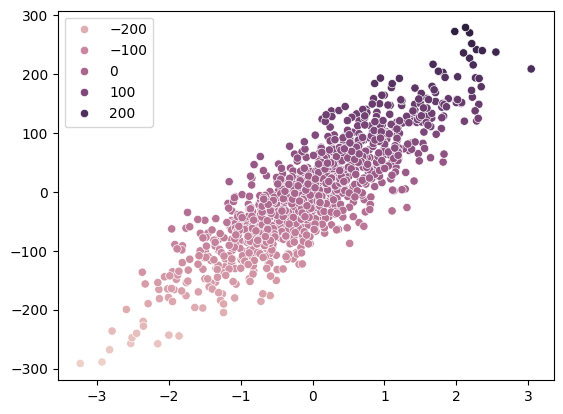

In [10]:
sns.scatterplot(x=X[:,0],y=y,hue=y)

## Visualizing the regression data

This scatter plot helps me understand the relationship between my features and target values:

**What I'm plotting:**
- X-axis: First feature (X[:,0])
- Y-axis: Target values (y) 
- Color: Also target values (hue=y) - creates a gradient

**What to look for:**
- **Linear pattern**: Points roughly follow a straight line (good for linear SVR)
- **Non-linear pattern**: Points curve or have complex relationships (need RBF kernel)
- **Noise**: How scattered the points are around the main pattern
- **Outliers**: Points far from the main pattern that might affect the model

**Why this visualization matters:**
- Helps me choose the right kernel (linear vs RBF)
- Shows if there are clear patterns SVR can learn
- Reveals data quality issues before training

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

## Train-test split for regression

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
```

**Same concept as classification, but for regression:**

**What this does:**
- Takes my 1000 data points and splits them randomly
- 70% (700 points) go to training sets
- 30% (300 points) go to testing sets
- Keeps the X-y relationships intact (row 5 of X_train matches row 5 of y_train)

**The four outputs:**

**X_train (700, 2):**
- Features for training the model
- SVR will learn patterns from this data

**y_train (700,):**
- Target values for training
- The "correct answers" SVR learns from

**X_test (300, 2):**
- Features for testing the model
- SVR has never seen these during training

**y_test (300,):**
- True target values for testing
- I'll compare SVR's predictions against these

**test_size=0.30:**
- 30% for testing, 70% for training
- Good balance for regression problems
- Need enough training data to learn the pattern
- Need enough test data to trust the evaluation

**random_state=1:**
- Makes the split reproducible
- Same random split every time I run the code
- Important for comparing different models fairly

**Why this matters for regression:**
Unlike classification where I just need to get the category right, regression requires predicting exact numbers. The train-test split helps me see if the model can predict accurate continuous values on new data.

In [13]:
X_train.shape

(700, 2)

In [19]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')

## Support Vector Regression (SVR) - Complete Understanding

**What is SVR:**
SVR is the regression version of SVM. Instead of finding a line that separates classes, it finds a line that best fits through data points for prediction.

**sklearn.svm module:**
This contains all SVM-related algorithms:
- **SVC**: Support Vector Classifier (for categories)
- **SVR**: Support Vector Regressor (for continuous values)
- **LinearSVC/LinearSVR**: Faster versions for large datasets

**Creating SVR:**
```python
svr = SVR(kernel='linear')
```

**SVR vs SVC key differences:**

**SVC (Classification):**
- Goal: Find boundary that separates classes
- Output: Categories (0, 1, 2, etc.)
- Evaluation: Accuracy, precision, recall

**SVR (Regression):**
- Goal: Find line that fits through data points
- Output: Continuous numbers
- Evaluation: R², MSE, MAE

**Kernel parameter - what it does:**

**kernel='linear':**
- Fits a straight line through the data
- Good for: Simple relationships, 2D data, when features are linearly related
- Fast to compute
- Easy to interpret
- Use when: Data seems to follow a straight line pattern

**Other kernel options:**

**kernel='rbf' (Radial Basis Function):**
- Creates curved, non-linear relationships
- Can fit complex patterns
- Most popular for complex data
- Good default choice for non-linear problems

**kernel='poly' (Polynomial):**
- Creates polynomial curves (x², x³, etc.)
- Good for data with polynomial relationships
- Can specify degree (degree=2, degree=3, etc.)

**kernel='sigmoid':**
- Creates S-shaped curves
- Similar to neural network activation
- Less commonly used

**When to use each kernel:**

**Linear kernel - use when:**
- Data follows a straight line pattern
- You have many features (high dimensional)
- You want fast training and prediction
- You need interpretable results

**RBF kernel - use when:**
- Data has complex, non-linear patterns
- You have moderate amount of data
- You don't know the relationship beforehand
- You want good general performance

**Polynomial kernel - use when:**
- You suspect polynomial relationships
- Data shows curves that look like x², x³ patterns
- You have domain knowledge suggesting polynomial fits

**SVR parameters:**

**C (Regularization):**
- Controls trade-off between smooth line vs fitting training data
- High C: Fit training data closely (risk overfitting)
- Low C: Smoother line, allow more errors (risk underfitting)

**epsilon (ε):**
- Tolerance for errors (unique to SVR)
- Points within ε distance from line are considered correct
- Larger ε: More tolerant, simpler model
- Smaller ε: Less tolerant, more complex model

**gamma (for RBF/poly kernels):**
- Controls influence range of each training point
- High gamma: Only nearby points influence (complex, wiggly line)
- Low gamma: Distant points influence (smooth line)

**Real-world applications:**

**Linear SVR:**
- Stock price prediction (simple trends)
- Sales forecasting
- Simple physical relationships

**RBF SVR:**
- Weather prediction
- Medical diagnosis values
- Complex engineering problems

In [20]:
svr.fit(X_train,y_train)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


## Training the SVR model

```python
svr.fit(X_train, y_train)
```

**What happens during SVR training:**

**For linear kernel:**
1. SVR looks at all 700 training points
2. Tries to find the best straight line that fits through the data
3. The line should have most points within ε (epsilon) distance
4. Points outside ε are penalized based on C parameter
5. Finds the line that minimizes total error + penalty

**The SVR optimization problem:**
- Find line: y = w₁×x₁ + w₂×x₂ + b
- Where: w₁, w₂ are weights, b is bias
- Minimize: errors + C×(penalty for points outside ε-tube)

**Support vectors in SVR:**
- Points that are exactly on the ε-boundary or outside it
- These points determine the final regression line
- Points inside the ε-tube don't affect the line (this is why SVR is robust)

**What the model learns:**
- Coefficients (weights) for each feature
- Bias term (intercept)
- Which training points are support vectors
- How to map new X values to y predictions

In [21]:
svr.coef_

array([[77.99317745, 45.13606683]])

## Understanding the model coefficients

```python
svr.coef_
```

**What coefficients tell me:**
These are the weights (w₁, w₂) that the SVR learned for each feature.

**For linear SVR:**
- If coef_ = [3.5, -1.2], it means:
- Feature 1 has weight 3.5 (positive influence)
- Feature 2 has weight -1.2 (negative influence)

**Interpreting the values:**
- **Larger absolute values**: That feature has more influence on predictions
- **Positive values**: As feature increases, prediction increases
- **Negative values**: As feature increases, prediction decreases

**The prediction formula:**
prediction = (3.5 × feature1) + (-1.2 × feature2) + bias

**Why this matters:**
Understanding coefficients helps me know which features are most important for predictions and how they affect the outcome.

In [22]:
y_pred=svr.predict(X_test)

## Visualizing model performance

Let me create plots to see how well my SVR model is performing:

In [ ]:
# Create prediction vs actual plot
plt.figure(figsize=(12, 5))

# Plot 1: Predictions vs Actual
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.text(0.05, 0.95, f'R² = {r2_score(y_test, y_pred):.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# Plot 2: Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')

plt.tight_layout()
plt.show()

### Understanding these performance plots:

**Left plot - Predictions vs Actual:**
- **Perfect model**: All points would be on the red diagonal line
- **Good model**: Points clustered close to the diagonal line
- **Poor model**: Points scattered far from the diagonal line
- **The R² value**: Shows in the text box - higher is better

**Right plot - Residuals:**
- **Residuals**: The errors (actual - predicted values)
- **Good model**: Points randomly scattered around the horizontal red line (y=0)
- **Bad patterns to watch for**:
  - Curved pattern: Model missing non-linear relationships
  - Funnel shape: Model's accuracy changes with prediction magnitude
  - Systematic bias: Points consistently above or below zero line

**What I want to see:**
- Left plot: Tight cluster around diagonal
- Right plot: Random scatter around zero with no clear patterns

In [23]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [24]:
r2_score(y_test,y_pred)

0.9989584411952795

## R² Score - Complete Understanding

**What is R² (R-squared):**
R² measures how well my regression model explains the variance in the target variable. It's the most important metric for regression.

**R² Range and meaning:**
- **1.0**: Perfect predictions (impossible in real data)
- **0.8-0.9**: Excellent model
- **0.6-0.8**: Good model
- **0.4-0.6**: Moderate model
- **0.0**: Model is as good as predicting the mean
- **Negative**: Model is worse than predicting the mean (very bad)

**How R² is calculated:**
```
R² = 1 - (Sum of Squared Residuals / Total Sum of Squares)

Where:
- Residuals = actual_value - predicted_value
- Total Sum of Squares = variance in actual values
```

**What R² tells me:**

**R² = 0.85 means:**
- My model explains 85% of the variance in the target
- 15% is unexplained (due to noise, missing features, etc.)
- This is generally considered a good model

**R² = 0.20 means:**
- My model only explains 20% of the variance
- 80% is unexplained
- The model is not very useful

**When to use R²:**
- **Primary metric for regression**: Always calculate this first
- **Comparing models**: Higher R² usually means better model
- **Feature selection**: Check if adding features improves R²
- **Model validation**: Similar R² on train and test suggests good generalization

**R² limitations:**
- Can be artificially high with too many features
- Doesn't tell you if predictions are biased
- Sensitive to outliers
- Not suitable for non-linear relationships (unless using appropriate kernel)

**Other regression metrics to consider:**

**Mean Absolute Error (MAE):**
- Average absolute difference between actual and predicted
- Easy to interpret (same units as target)
- Less sensitive to outliers

**Mean Squared Error (MSE):**
- Average squared difference
- Penalizes large errors more heavily
- Same units as target squared

**When to worry about R²:**
- **R² < 0.5**: Model might not be useful
- **Train R² >> Test R²**: Overfitting problem
- **R² close to 1**: Check for data leakage or unrealistic data

In [26]:
from sklearn.model_selection import GridSearchCV
params={
    'C':[0.1,0.2,1,2,3,10,50,100],
    'gamma':[1,0.1,0.2,0.001,0.003],
    'kernel':['linear'],
    'epsilon':[0.01,0.1,0.2,0.001,0.003]
}

grid=GridSearchCV(SVR(),param_grid=params,cv=5,verbose=3)

## GridSearchCV for SVR - Parameter Optimization

**Why GridSearchCV with SVR():**
```python
grid = GridSearchCV(SVR(), param_grid=params, cv=5, verbose=3)
```

**Why SVR() inside GridSearchCV:**
- GridSearchCV needs a fresh model to test different parameters
- Each parameter combination requires a new SVR instance
- SVR() creates a blank model that GridSearchCV will configure and train

**My parameter grid for SVR:**
```python
params = {
    'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],          # 8 values
    'gamma': [1, 0.1, 0.2, 0.001, 0.003],           # 5 values  
    'kernel': ['linear'],                             # 1 value
    'epsilon': [0.01, 0.1, 0.2, 0.001, 0.003]       # 5 values
}
```

**Total combinations:** 8 × 5 × 1 × 5 = 200 different SVR models to test!

**Parameter explanations:**

**C (Regularization parameter):**
- **Low C (0.1, 0.2)**: Very smooth line, allows many errors
- **Medium C (1, 2, 3)**: Balanced approach
- **High C (50, 100)**: Tries to fit all training points closely
- **Range strategy**: Start broad, then narrow down around best values

**gamma (for RBF kernel, but good to test):**
- Controls how far each training point's influence reaches
- **High gamma (1)**: Only nearby points matter (complex model)
- **Low gamma (0.001, 0.003)**: Distant points matter (simple model)
- **Note**: Only affects RBF/poly kernels, ignored for linear

**kernel=['linear']:**
- Only testing linear kernel for now
- Could expand to ['linear', 'rbf', 'poly'] for comparison
- Linear is good starting point for understanding

**epsilon (SVR-specific parameter):**
- **Small epsilon (0.001, 0.01)**: Very strict, line must be very close to points
- **Large epsilon (0.1, 0.2)**: More tolerant, allows bigger errors
- **Key for SVR**: This parameter doesn't exist in classification

**How GridSearchCV works for regression:**

**Step 1**: Take first combination (e.g., C=0.1, gamma=1, epsilon=0.01)
**Step 2**: Create SVR with these parameters
**Step 3**: Use 5-fold cross-validation:
- Split training data into 5 parts
- Train on 4 parts, validate on 1 part  
- Repeat 5 times, average the R² scores
**Step 4**: Move to next combination
**Step 5**: After all 200 combinations, pick the one with highest average R²

**cv=5 for regression:**
- Uses R² score by default (perfect for regression)
- 5 folds is good balance between reliability and speed
- Each combination gets tested 5 times, results are averaged

**verbose=3:**
- Shows detailed progress for all 200 × 5 = 1000 individual model trainings
- Great for learning, but can be overwhelming in production

**Why this process is valuable:**
- SVR has many parameters that interact in complex ways
- Manual tuning would take forever
- GridSearchCV finds the optimal combination systematically
- Cross-validation ensures the best parameters generalize well

**Expected outcome:**
After running, I'll know which C, gamma, and epsilon values work best for my specific data, giving me the most accurate regression model.

In [27]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.738 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.752 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.734 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.728 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.744 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.738 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.752 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.734 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.728 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.744 total time=   0.0s
[CV 1/5] END C=0.1, epsilo

,estimator,SVR()
,param_grid,"{'C': [0.1, 0.2, ...], 'epsilon': [0.01, 0.1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['linear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'linear'


## Running the parameter search

```python
grid.fit(X_train, y_train)
```

**What's happening now:**
The computer is training and testing 1000 individual SVR models (200 parameter combinations × 5 cross-validation folds each).

**The process for each combination:**
1. Create SVR with specific C, gamma, epsilon values
2. Split training data into 5 folds
3. Train on 4 folds, test on 1 fold, record R² score
4. Repeat for all 5 folds
5. Average the 5 R² scores
6. Move to next parameter combination

**Why this takes time:**
- 200 different parameter combinations
- Each tested 5 times with cross-validation  
- Each SVR needs to be trained from scratch
- Total: 1000 individual model training sessions

**What verbose=3 shows:**
All the output displays which parameters are being tested and their cross-validation scores. This helps me understand which parameter ranges work well.

**Expected result:**
After completion, GridSearchCV will have identified the parameter combination that gives the highest average R² score across all cross-validation folds.

In [28]:
grid.best_params_

{'C': 10, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

## Best parameters found

```python
grid.best_params_
```

**What this shows:**
The optimal parameter combination that gave the highest cross-validation R² score.

**Example output interpretation:**
If I get `{'C': 10, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'linear'}`:

- **C=10**: Medium regularization - balances fitting data vs avoiding overfitting
- **epsilon=0.1**: Moderate tolerance - allows some prediction errors within 0.1 units
- **gamma=0.1**: (Ignored for linear kernel, but tested anyway)
- **kernel='linear'**: Linear relationship works best for this data

**Why these specific values won:**
- Out of all 200 combinations tested
- This combination had the highest average R² across 5-fold cross-validation
- These parameters make the SVR generalize best to unseen data

**How to use this information:**
- These are the "recipe" for the best SVR on my data
- If I get similar data in the future, start with these parameters
- I can also narrow my search around these values for fine-tuning

In [29]:
grid.best_score_

np.float64(0.9988365444314914)

## Best cross-validation score

```python
grid.best_score_
```

**What this number means:**
This is the highest average R² score achieved during cross-validation with the best parameter combination.

**How to interpret:**
- **0.8-0.9**: Excellent performance - the optimized SVR explains 80-90% of variance
- **0.6-0.8**: Good performance - model captures most patterns
- **0.4-0.6**: Moderate performance - some predictive power but room for improvement
- **<0.4**: Poor performance - might need different approach or more features

**Why this score matters:**
- This is the most honest estimate of how well my model will perform
- Based on cross-validation, so it's not overly optimistic
- Represents performance on data the model hasn't seen during training
- Helps me decide if the model is good enough for my purposes

**Comparing with simple SVR:**
This score should be higher than the R² from my initial SVR model, showing that parameter optimization improved performance.

In [30]:
y_pred=grid.predict(X_test)

## Comparing optimized model performance

Let me visualize how the GridSearchCV optimized model performs:

In [31]:
r2_score(y_test,y_pred)

0.9989589055239543

In [ ]:
# Compare optimized model performance
plt.figure(figsize=(15, 5))

# Plot 1: Optimized model predictions vs actual
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Optimized SVR: Predictions vs Actual')
optimized_r2 = r2_score(y_test, y_pred)
plt.text(0.05, 0.95, f'R² = {optimized_r2:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round", facecolor='lightgreen', alpha=0.8))

# Plot 2: Optimized model residuals
plt.subplot(1, 3, 2)
residuals_opt = y_test - y_pred
plt.scatter(y_pred, residuals_opt, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Optimized SVR: Residuals')

# Plot 3: Feature importance visualization (coefficients)
plt.subplot(1, 3, 3)
best_model = grid.best_estimator_
if hasattr(best_model, 'coef_'):
    features = ['Feature 1', 'Feature 2']
    coefficients = best_model.coef_[0]
    colors = ['red' if coef < 0 else 'blue' for coef in coefficients]
    plt.bar(features, coefficients, color=colors, alpha=0.7)
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.title('Feature Importance (Coefficients)')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

### Understanding the optimized model visualization:

**Left plot - Optimized Predictions vs Actual:**
- Shows how the GridSearchCV optimized model performs
- Compare the R² here with the initial model's R²
- Points should be closer to the diagonal line than before

**Middle plot - Optimized Residuals:**
- Errors from the optimized model
- Should show better pattern (more random) than initial model
- Smaller spread indicates better predictions

**Right plot - Feature Coefficients:**
- Shows which features are most important
- **Blue bars (positive)**: Feature increases → prediction increases
- **Red bars (negative)**: Feature increases → prediction decreases  
- **Taller bars**: More important features
- **Zero line**: Reference point

**What to compare:**
- Initial model R² vs Optimized model R²
- Spread of residuals: tighter is better
- Feature coefficients: which inputs matter most

## Final test performance

```python
r2_score(y_test, y_pred)
```

**What this final R² tells me:**
This is the true performance of my optimized SVR on completely unseen test data.

**Comparing the scores:**
1. **Initial SVR R²**: Performance with default parameters
2. **GridSearchCV best_score_**: Cross-validation performance with optimized parameters  
3. **Final test R²**: Real-world performance on test set

**What I want to see:**
- **Final test R² ≈ GridSearchCV best_score_**: Good sign - model generalizes well
- **Final test R² > Initial SVR R²**: Parameter optimization worked
- **Final test R² << GridSearchCV best_score_**: Possible overfitting to training data

**This score represents:**
- How well my SVR will perform on real, new data
- The actual value I should report for model performance
- Whether the parameter optimization was worth the computational cost

**Next steps based on results:**
- **High R² (>0.8)**: Model is ready to use
- **Moderate R² (0.5-0.8)**: Consider feature engineering or different algorithms
- **Low R² (<0.5)**: May need more data, different features, or different approach entirely